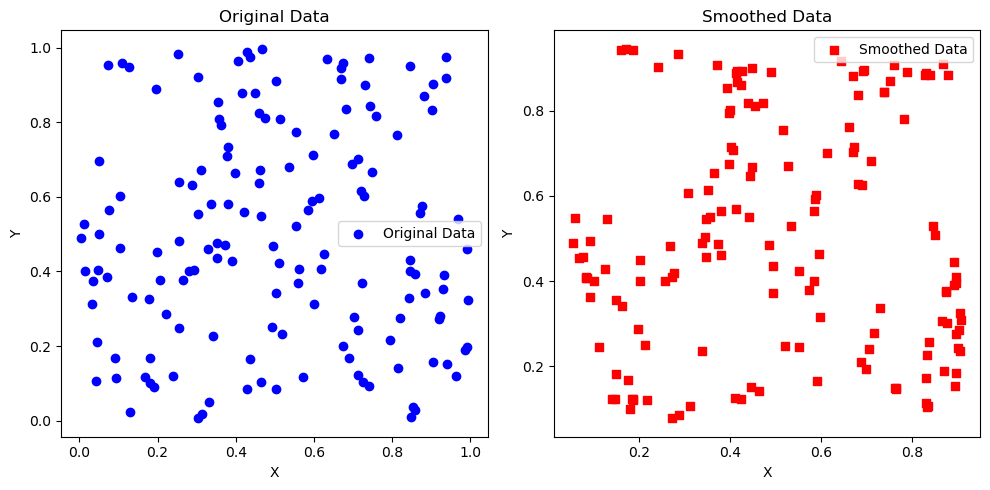

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Program to implement sphere smoothing
# Smoothing is the technique used to reduce noise/irregularities within data,
# and there are 2 primary methods of doing this - gaussian smoothing and 
# sphere smoothing.

# The difference between sphere smoothing and gaussian smoothing is that 
# while gaussian smoothing uses a Gaussian distribution (a weighted matrix
# that prioritizes nearer objects) to estimate the gradient,
# sphere smoothing generates a set of random directions from the set of unit 
# vectors from a sphere (a weighted matrix where everything is weighted evenly.)
# It is particularly useful when all points are weighted equally,
# or in distributions where the points are distributed in a sphere.

# Here, we are using random data points, which can simulate the 
# data returned by a non-linear function which would require DFO. 
# We can also use spherical smoothing to determine the gradient at any point
# in a nonlinear function.

# CALCULATIONS
import numpy as np
import matplotlib.pyplot as plt

# Defining the function for sphere smoothing, taking as input the data vector and the radius of the circle,
# which is representative of the neighborhood where these points are coming from-
# AKA the maximum distance threshold.
def sphere_smoothing(data, radius):
    # initializing the data-sized matrix in list form:
    smoothed_data = np.zeros_like(data)
    # initializing the data-lengthed int equal to the number of points we'll use for our loops later on:
    n_points = len(data)

    # Nested loop statement to average each data point with the nearest data point:

    # for loop to keep track of the averaged data points:
    for i in range(n_points):
        count = 0
        average_point = np.zeros_like(data[0])

        # nested if inside for loop to test if:
        # 1.) ensure i does not equal j (aka point i is not the same point as j)
        # 2.) calculate the euclidean distance (AKA the hypotenuse/matrux norm) between two points in space
        #     (data[i, :2] - data[j, :2])
        # 3.) the x and y coordinates of the given data are less than or equal to the data
        for j in range(n_points):
            if i != j and np.linalg.norm(data[i, :2] - data[j, :2]) <= radius:  # Considering only x and y dimensions, ensure
                # that the x and y coordinates of the given data are less than or equal to the data
                average_point += data[j]
                count += 1

        # if count (number of elements around data point i) > 0,
        # aka if there is more than 1 element in the data set,
        if count > 0:
            # the value stored within the smoothes_data matrix shall equal the average of the point i and its nearest neighboring point
            average_point /= count
            smoothed_data[i] = average_point
        else:
            # else, the smoothed_data shall equal the initial point i (randomly-generated by the np.random.rand function in this case)
            smoothed_data[i] = data[i]

    return smoothed_data

# EXAMPLE USAGE
# Generate some random data points (replace this with your actual dataset)
# Try adjusting the max. number of data points to see examples of under and overfitting
data = np.random.rand(150, 3)  # 100 points in 3D space
radius = 0.2  # Adjust the radius as needed

# Calling the sphere smoothing function on our newly-generated dataset:
smoothed_data = sphere_smoothing(data, radius)



# DISPLAY
# Plotting original data and smoothed data in 2D (x and y dimensions only)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o', label='Original Data')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(smoothed_data[:, 0], smoothed_data[:, 1], c='r', marker='s', label='Smoothed Data')
plt.title('Smoothed Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()